## Instructions {-}

1. You may talk to a friend, discuss the questions and potential directions for solving them. However, you need to write your own solutions and code separately, and not as a group activity. 

2. Write your code in the **Code cells** and your answers in the **Markdown cells** of the Jupyter notebook. Ensure that the solution is written neatly enough to for the graders to understand and follow.

3. Use [Quarto](https://quarto.org/docs/output-formats/html-basics.html) to render the **.ipynb** file as HTML. You will need to open the command prompt, navigate to the directory containing the file, and use the command: `quarto render filename.ipynb --to html`. Submit the HTML file.

4. The assignment is worth 100 points, and is due on **18th October 2025 at 11:59 pm**. 

5. **Five points are properly formatting the assignment**. The breakdown is as follows:
    - Must be an HTML file rendered using Quarto **(1 point)**. *If you have a Quarto issue, you must mention the issue & quote the error you get when rendering using Quarto in the comments section of Canvas, and submit the ipynb file.* 
    - No name can be written on the assignment, nor can there be any indicator of the student’s identity—e.g. printouts of the working directory should not be included in the final submission.  **(1 point)**
    - There aren’t excessively long outputs of extraneous information (e.g. no printouts of entire data frames without good reason, there aren’t long printouts of which iteration a loop is on, there aren’t long sections of commented-out code, etc.) **(1 point)**
    - Final answers to each question are written in the Markdown cells. **(1 point)**
    - There is no piece of unnecessary / redundant code, and no unnecessary / redundant text. **(1 point)**

6.  The maximum possible score in the assigment is 100  + 15 (bonus task) + 5 (AI usage disclosure)= 120 out of 100.

## Objective

- **Reinforce Knowledge of Gradient Descent:** Apply your understanding of gradient descent to classification problems by implementing logistic regression and softmax regression from scratch.
- **Hands-on Implementation:** Build classification models manually to gain deeper insights into their mathematical foundations and working principles.
- **Explore Customization Options:** Learn how implementing models from scratch allows you to:
  - Adjust and optimize model parameters for specific requirements.
  - Add features or constraints that might not be possible with standard libraries.
- **Compare with Pre-built Models:** Use scikit-learn’s logistic regression as a baseline to evaluate the performance and efficiency of your custom implementation. This will help you understand when to use custom models and when to leverage pre-built ones.
- **Prepare for Real-world Scenarios:** Understand the scenarios where off-the-shelf models are not sufficient, allowing you to confidently tackle complex machine learning problems and create novel solutions.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Refreshing the Foundations: Sigmoid & Logistic Regression

### Why Logistic Regression? The Classification Challenge

<p align="center">
  <img src="images/image-96.webp" alt="Logistic Cost Function" width="400">
</p>

**The Problem**: Linear regression gives us $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot  \mathbf{x}^{(i)} + b$, but for classification:

- **Linear regression outputs**: Any real number (-∞ to +∞)
- **Classification needs**: Probabilities between 0 and 1
- **Binary targets**: $y \in \{0, 1\}$ (e.g., Disease/No Disease, Spam/Not Spam)

**The Solution**: Transform linear outputs into probabilities using the **sigmoid function**, creating a model that outputs meaningful probabilities for binary classification decisions.

**Real-World Context**: In this assignment, you'll predict heart disease risk where:
- **Input**: Patient medical data (age, cholesterol, chest pain type, etc.)
- **Output**: Probability of heart disease (0 = healthy, 1 = disease)
- **Goal**: Build a model doctors can trust for medical decision-making


### The Sigmoid Function: Mathematical Bridge to Probabilities

**Mathematical Definition:**
$$g(z) = \frac{1}{1 + e^{-z}} \tag{1}$$

**What This Function Does:**
- **Input $z$**: Any real number (-∞ to +∞) from linear model
- **Output $g(z)$**: Always between 0 and 1 (perfect for probabilities!)
- **S-shaped curve**: Smooth transition from 0 to 1

**Key Properties:**
- **$g(0) = 0.5$**: Neutral prediction (equal probability of both classes)
- **$g(z) \to 1$** as $z \to +\infty$: Strong positive evidence → high probability  
- **$g(z) \to 0$** as $z \to -\infty$: Strong negative evidence → low probability
- **Always smooth**: No sudden jumps, making it perfect for gradient descent optimization

**Practical Interpretation:**
In logistic regression, $z = \mathbf{w} \cdot \mathbf{x} + b$ represents the "log-odds" or "logit":
- **Positive $z$**: Model leans toward class 1 (e.g., "has disease")
- **Negative $z$**: Model leans toward class 0 (e.g., "healthy")  
- **Magnitude of $|z|$**: Confidence level of the prediction

**Implementation Note**: NumPy's [`exp()`](https://numpy.org/doc/stable/reference/generated/numpy.exp.html) function handles vectorized computation efficiently, but requires careful numerical handling to avoid overflow (which you'll implement!).

### Logistic Regression: Model
<img align="left" src="./images/C1_W3_LogisticRegression_right.png"     style=" width:300px; padding: 10px; " > A logistic regression model applies the sigmoid to the familiar linear regression model as shown below:

$$ 
f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b ) \tag{2} 
$$ 

  where

  $$
  g(z) = \frac{1}{1+e^{-z}}\tag{3}
  $$

### Logistic Regression: Loss Function

Logistic Regression uses a loss function more suited to the task of categorization where the target is 0 or 1 rather than any number. 

>**Definition Note:**   In this course, these definitions are used:  
**Loss** is a measure of the difference of a single example to its target value while the  
**Cost** is a measure of the losses over the training set


This is defined: 
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

\begin{equation}
  loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = \begin{cases}
    - \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=1$}\\
    - \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=0$}
  \end{cases}
\end{equation}


*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value.

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot\mathbf{x}^{(i)}+b)$ where function $g$ is the sigmoid function.

The defining feature of this loss function is the fact that it uses two separate curves. One for the case when the target is zero or ($y=0$) and another for when the target is one ($y=1$). Combined, these curves provide the behavior useful for a loss function, namely, being zero when the prediction matches the target and rapidly increasing in value as the prediction differs from the target. Consider the curves below:

<div style="text-align: center;">
    <img src=https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTIyEcDUIGx9kLDohkOyjq8X2OkQZbxLoVW3JyEefVtog&s alt="Description of image" width="400"/>
</div>

Combined, the curves are similar to the quadratic curve of the squared error loss. Note, the x-axis is $f_{\mathbf{w},b}$ which is the output of a sigmoid. The sigmoid output is strictly between 0 and 1.

The loss function above can be rewritten to be easier to implement.
    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)$$
  
This is a rather formidable-looking equation. It is less daunting when you consider $y^{(i)}$ can have only two values, 0 and 1. One can then consider the equation in two pieces:  
when $ y^{(i)} = 0$, the left-hand term is eliminated:
$$
\begin{align}
loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), 0) &= (-(0) \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - 0\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \\
&= -\log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)
\end{align}
$$
and when $ y^{(i)} = 1$, the right-hand term is eliminated:
$$
\begin{align}
  loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), 1) &=  (-(1) \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - 1\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)\\
  &=  -\log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)
\end{align}
$$

**Why This Loss Function Works:**
1. **Probabilistic Foundation**: Derived from maximum likelihood estimation
2. **Convex Optimization**: Guarantees unique global minimum (perfect for gradient descent)
3. **Penalizes Confidence**: Wrong confident predictions get heavily penalized
4. **Smooth Gradients**: Enables stable gradient descent convergence

**Connection to Your Implementation**: This loss function is exactly what you'll implement in Task 1, with the addition of L2 regularization to prevent overfitting on the heart disease dataset.

### Logistic Regression: Cost Function (Training Objective)

**From Individual Loss to Overall Cost:**

The **cost function** aggregates individual losses across all training examples to create our optimization objective:

$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

Where the individual **loss** for each example is:

$$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$

**The Complete Model Pipeline:**
$$
\begin{align}
  f_{\mathbf{w},b}(\mathbf{x^{(i)}}) &= g(z^{(i)})\tag{3} \\
  z^{(i)} &= \mathbf{w} \cdot \mathbf{x}^{(i)}+ b\tag{4} \\
  g(z^{(i)}) &= \frac{1}{1+e^{-z^{(i)}}}\tag{5} 
\end{align}
$$

**Optimization Goal**: Find weights $\mathbf{w}$ and bias $b$ that minimize $J(\mathbf{w},b)$ using **gradient descent**.


## Bridge to Implementation: What You'll Build

### Your Assignment Journey:
1. **Task 1**: Implement cost function with L2 regularization → **20 points**  
2. **Task 2**: Apply to heart disease dataset with preprocessing → **15 points**  
3. **Task 3**: Experiment with regularization strength (λ) → **20 points**  
4. **Task 4**: Benchmark against scikit-learn LogisticRegression → **20 points**  
5. **Task 5**: Explore the `tol` parameter in gradient descent–based models → **15 points**  
6. **Task 6**: Summarize key learnings and insights → **5 points** 

### ⭐ Bonus Task  
Extend your L2-regularized logistic regression by adding a **`tol` stopping criterion**, and compare its behavior with scikit-learn’s implementation -> **15 points**
   
### Key Implementation Challenges You'll Solve:

- **Numerical Stability**: Prevent `log(0)` errors that break gradient descent
- **Vectorization**: Implement efficient matrix operations for real-world performance
- **Regularization**: Add L2 penalty to prevent overfitting on complex medical data
- **Gradient Computation**: Derive and implement the gradient for weight updates
- **Convergence Monitoring**: Track training progress and detect overfitting

### Real-World Impact:
Your implementation will predict heart disease risk using patient data—a model that could potentially assist medical professionals in making life-saving decisions. The mathematical rigor you develop here translates directly to production ML systems used in healthcare, finance, and technology.
 

## Task 1: Implementing L2 Regularized Logistic Regression with Vectorized Gradient Descent **(20 points)**

###  **Objective**
Implement a complete L2 regularized (Ridge) logistic regression algorithm from scratch using vectorized operations to prevent overfitting in binary classification problems.

### 📋 **Implementation Requirements**

#### **Main Function Signature**
Your implementation should create a main training function that takes these inputs:

- **X_train** (ndarray): Training feature matrix (m × n) - **Note**: Should include bias column of ones as first column
- **y_train** (ndarray): Training labels (m × 1) 
- **X_test** (ndarray): Test feature matrix for monitoring overfitting - **Note**: Should include bias column  
- **y_test** (ndarray): Test labels for performance tracking
- **w_in** (ndarray): Initial weights ((n+1) × 1) - **Includes bias weight as first element**
- **alpha** (float): Learning rate (typically 0.001 - 0.01)
- **num_iters** (int): Number of training iterations
- **lambda_reg** (float): L2 regularization strength (λ ≥ 0)

#### **Expected Outputs**
- **Optimized parameters**: Final weights after training
- **Training cost history**: Cost values at each iteration on training data
- **Test cost history**: Cost values at each iteration on test data (for overfitting analysis)

### **Implementation Structure**

#### **Step 1: Cost Function with L2 Regularization**
```python
def compute_cost_logistic_ridge(X, y, w, lambda_reg):
```
**Mathematical Formula:**
$$J(w) = \frac{1}{m}\sum_{i=1}^{m} \left[ -y^{(i)} \log(h_w(x^{(i)})) - (1-y^{(i)}) \log(1-h_w(x^{(i)})) \right] + \frac{\lambda}{2m} \sum_{j=1}^{n} w_j^2$$

Where $h_w(x) = \sigma(w^T x)$ and $\sigma(z) = \frac{1}{1+e^{-z}}$

**Key Implementation Notes:**

- Use vectorized operations for efficiency
- **Bias handling**: Don't regularize the bias term (w[0]) - exclude from L2 penalty
- **Data preparation**: Add column of ones to X matrices for bias term
- Handle numerical stability with log functions

**Why Numerical Stability Matters:**

- **When h = 0**: `log(0) = -∞` → **NaN in cost calculations**
- **When h = 1**: `log(1-h) = log(0) = -∞` → **NaN in cost calculations**  
- **When it occurs**: Sigmoid outputs extreme values (overconfident predictions)
- **Consequence**: Entire gradient descent breaks due to NaN propagation

   **Practical Example:**
   ```python
   # Without clipping - BREAKS!
   h = np.array([0.0, 0.5, 1.0])  # Sigmoid predictions
   cost = -np.log(h)  # Returns: [inf, 0.693, 0.0]
   # ↑ inf values propagate to gradients → NaN → training failure

   # With clipping - WORKS!
   h_safe = np.clip(h, 1e-15, 1-1e-15)  # Safe range: [1e-15, 1-1e-15]
   cost = -np.log(h_safe)  # Returns: [34.54, 0.693, 34.54]  
   # ↑ All finite values → stable gradients → successful training
   ```

**Professional Tip**: All major ML libraries (TensorFlow, PyTorch, sklearn) use similar clipping internally!

#### **Step 2: Gradient Computation with L2 Regularization**
```python
def compute_gradient_logistic_ridge(X, y, w, lambda_reg):
```
**Mathematical Formula:**
$$\frac{\partial J}{\partial w_j} = \frac{1}{m} X^T (\sigma(Xw) - y) + \frac{\lambda}{m} w_j \quad \text{(for } j > 0\text{)}$$
$$\frac{\partial J}{\partial w_0} = \frac{1}{m} X^T (\sigma(Xw) - y) \quad \text{(bias term, no regularization)}$$

**Implementation Note**: The gradient vector should be same shape as w_in ((n+1) × 1), where the first element corresponds to the bias term gradient (no regularization) and remaining elements include the L2 regularization term.

#### **Step 3: Gradient Descent Algorithm**
```python
def gradient_descent_logistic_ridge(X_train, y_train, X_test, y_test, w_in, alpha, num_iters, lambda_reg):
```

#### 💡 **Implementation Tips**

1. **Bias Term Setup**: 
   - Add column of ones as **first column** of X matrices: `X = np.column_stack([np.ones(m), X_features])`
   - Initialize w_in with shape (n+1, 1) where w[0] is bias, w[1:] are feature weights
2. **Vectorization**: Use matrix operations instead of loops for efficiency
3. **Numerical Stability**: 
   - Clip extreme values in sigmoid to prevent overflow
   - Use `np.clip(predictions, 1e-15, 1-1e-15)` for log calculations
4. **Regularization Implementation**: 
   - Create regularization vector: `reg_term = np.copy(w); reg_term[0] = 0` (exclude bias)
   - Add to gradient: `gradient + (lambda_reg/m) * reg_term`
5. **Monitoring**: Track both training and test costs to observe overfitting


#### ✅ **Validation Checklist**
- [ ] Cost decreases monotonically during training
- [ ] Implementation uses vectorized operations (no explicit loops over samples)
- [ ] Regularization term correctly excludes bias
- [ ] Both training and test costs are tracked
- [ ] Function handles edge cases (very small/large predictions)


In [23]:
### stable sigmoid fn
def sigmoid(z):
  z = np.clip(z, -500, 500)
  return 1 / (1 + np.exp(-z))

### cost function

def compute_cost_logistic_ridge(X, y, w, lambda_reg):
    m = X.shape[0]

    # compute predictions and clip extreme values
    z = X @ w
    h = sigmoid(z)
    h = np.clip(h, 1e-15, 1-1e-15)

    # compute cost
    logistic_cost = -(y * np.log(h) + (1 - y) * np.log(1 - h)).mean()
    reg_cost = (lambda_reg / (2 * m)) * np.sum(w[1:] ** 2)
    cost = logistic_cost + reg_cost
    return cost


### gradient computation

def compute_gradient_logistic_ridge(X, y, w, lambda_reg):
    m = X.shape[0]

    # compute predictions and clip extreme values
    z = X @ w
    
    h = sigmoid(z)
    h = np.clip(h, 1e-15, 1-1e-15)

    # compute gradient
    dj_dw = (X.T @ (h - y)) / m
    reg_term = np.zeros_like(w)
    reg_term[1:] = (lambda_reg / m) * w[1:]
    dj_dw += reg_term
    return dj_dw


### gradient descent function

def gradient_descent_logistic_ridge(X_train, y_train, X_test, y_test, w_in, alpha, num_iters, lambda_reg):
  
  
  # bias term setup
  m_train = X_train.shape[0]
  m_test = X_test.shape[0]
  X_train_bias = np.column_stack([np.ones(m_train), X_train])
  X_test_bias = np.column_stack([np.ones(m_test), X_test])

  # initialize cost histories
  J_history = []
  test_J_history = []

  w = np.copy(w_in)

  # gradient descent loop
  for i in range(num_iters):
    gradient = compute_gradient_logistic_ridge(X_train_bias, y_train, w, lambda_reg)
    train_cost = compute_cost_logistic_ridge(X_train_bias, y_train, w, lambda_reg)
    test_cost = compute_cost_logistic_ridge(X_test_bias, y_test, w, lambda_reg)
    J_history.append(train_cost)
    test_J_history.append(test_cost)

    # update weights
    w = w - alpha * gradient
    if i % 300 == 0:
      print(f"Iteration {i:4}: Train Cost {train_cost:8.4f}   Test Cost {test_cost:8.4f}")
  return w, J_history, test_J_history



## Task 2: Apply your implementation on a real dataset **(15 points)**

### **Objective**
Apply your L2 regularized logistic regression implementation to predict heart disease using a real medical dataset, demonstrating proper data preprocessing, model training, and performance visualization.

### **Dataset Overview** 
The **heart_disease_classification.csv** contains medical data for heart disease prediction with:

- **Target**: Binary classification (0=No Disease, 1=Disease)  
- **Features**: Mix of numerical (age, cholesterol) and categorical (chest pain type, slope)
- **Challenge**: Categorical variables need proper encoding for your algorithm

### 📋 **Step-by-Step Implementation Guide**

#### **Step 1: Data Loading and Initial Exploration**

In this step, you will begin by **importing the dataset into your working environment** (e.g., using `pandas.read_csv()` for CSV files). After successfully loading the data, perform some **basic exploratory checks** to understand its structure and contents. This includes:

- Displaying the **first few rows** of the dataset with `.head()` to get a sense of the data format  
- Checking the **dimensions** of the dataset with `.shape` to see how many rows and columns are available  
- Inspecting the **column names and data types** with `.info()` to identify numerical, categorical, and datetime features  
- Reviewing **summary statistics** with `.describe()` to quickly understand ranges, averages, and distributions of numeric columns  

This step ensures that you have properly loaded the dataset and gained a **high-level understanding of its characteristics**, which is essential before moving into deeper transformation, or modeling tasks.

In [3]:
data = pd.read_csv('st_heart_disease_classification.csv')
print(data.head())
print("Dimensions:", data.shape)
print("Data info:", data.info())
print("Summary stats:", data.describe())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
Dimensions: (303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 n

#### **Step 2: Data Shuffling and Feature-Target Separation (*random_state=0*)**

After loading and exploring the dataset, the next step is to **prepare it for modeling**. This involves two tasks:

1. **Shuffling the data**
   - Many real-world datasets, especially in domains like **medicine**, are collected in sequential order (e.g., sorted by collection date, patient ID, or clinical visit number).  
   - If you split the dataset without shuffling, the training set may contain only earlier cases and the test set may contain only later ones. This can introduce **temporal or ID-based bias** and reduce the model’s ability to generalize.  
   - Shuffling ensures that the **distribution of samples is random**, giving both training and test sets a representative mix of patients and outcomes.  
   - We use `random_state=0` to make the shuffle **reproducible**, so everyone gets the same randomized order.  

2. **Separating features and target**
   - Define the **target variable** (the outcome you want to predict, e.g., disease status, biomarker level, or treatment response).  
   - Select the **features** (independent variables, such as patient demographics, lab values, or imaging-derived metrics).  
   - Split the dataset into:  
     - `X` → the **feature matrix** (all input variables except the target)  
     - `y` → the **target vector** (the label or response variable)  

In [4]:
data_shuffled = data.sample(frac=1, random_state=0)
y = data_shuffled['target']
X = data_shuffled.drop('target', axis=1)

#### **Step 3: Train–Test Split (random_state=42) and Feature Scaling**

Once the dataset is shuffled and the features (`X`) and target (`y`) are separated, the next step is to **divide the data into training and testing subsets**.  

- **Training set**: Used to fit the model (learn the patterns from the data).  
- **Test set**: Held back to evaluate how well the model generalizes to unseen data.  

We typically use **80% of the data for training** and **20% for testing**, though this ratio can be adjusted based on dataset size and problem context.  

To ensure reproducibility, we specify `random_state=42` when performing the split.  

##### ✅ Why split the data?

- Prevents **overfitting** by ensuring the model is evaluated on unseen data.  
- Mimics a real-world scenario where the model encounters new patient cases.  
- Provides an unbiased estimate of model performance. 

##### ✅ Why scaling matters
- Features may be measured on very different scales (e.g., **age** ranges 20–80, while **cholesterol** may range 100–600).  
- Algorithms that use **gradient descent** (e.g., logistic regression, neural networks) can converge slowly or get stuck if features are not scaled properly.  
- Scaling puts all features on a **comparable range**, improving both **training stability** and **model performance**. 

**Important Notes**:  

- Use `fit_transform()` **only on the training set** so the scaler does not "see" information from the test set (**avoiding data leakage**).  
- Apply the fitted scaler to the **test set** using `transform()`.


In [5]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### **Step 4: Categorical Variable Encoding**

The dataset contains **categorical variables** that must be converted into numerical form before modeling. Most machine learning algorithms cannot directly handle categorical text values, so we use **binary (dummy) encoding**.


**Required Encoding for These Columns:**
- **`cp`** (Chest Pain Type): Convert into binary dummy variables  
- **`thal`** (Thalassemia): Convert into binary dummy variables  
- **`slope`** (ST Slope): Convert into binary dummy variables  


##### ✅ Why Encode?
- Machine learning algorithms work with **numbers**, not text labels.  
- Encoding categorical variables as dummy variables prevents the model from assuming an **ordinal relationship** between categories (e.g., category "3" is not “greater than” category "1").  
- This ensures that the algorithm treats categories as **independent groups**.  



##### Example (using `pandas.get_dummies`)

```python
import pandas as pd

# Encode categorical variables into dummy variables
df_encoded = pd.get_dummies(df, columns=['cp', 'thal', 'slope'], drop_first=True)

# View the new columns
df_encoded.head()
```
Here:

- `pd.get_dummies()` automatically creates binary (0/1) columns for each category.

- `drop_first=True` avoids multicollinearity by dropping one category from each variable as the reference group.


In [6]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_scaled_encoded = pd.get_dummies(X_train_scaled_df, columns=['cp', 'thal', 'slope'], drop_first=True).astype(float)
X_test_scaled_encoded = pd.get_dummies(X_test_scaled_df, columns=['cp', 'thal', 'slope'], drop_first=True).astype(float)

X_test_scaled_encoded = X_test_scaled_encoded.reindex(columns=X_train_scaled_encoded.columns)

X_train_scaled_encoded.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,cp_0.060493215562208866,cp_1.0364504266325116,cp_2.012407637702814,thal_-2.0610068123638965,thal_-0.48761990828798807,thal_1.0857669957879204,slope_-0.6014452048234693,slope_1.015774123701859
0,-1.624868,0.676632,1.166618,-0.483204,-0.424839,0.913138,1.410213,-0.696177,-0.928606,-0.711762,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-0.163091,0.676632,0.590687,-0.427881,-0.424839,-1.059892,-1.672638,1.436416,-0.928606,-0.711762,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,-0.050646,-1.477907,0.187535,1.010530,2.353835,0.913138,0.925765,-0.696177,-0.928606,-0.711762,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.387980,0.676632,-1.252294,-1.368380,-0.424839,0.913138,-1.144149,-0.696177,-0.411606,-0.711762,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.961353,-1.477907,1.051432,2.909969,-0.424839,-1.059892,0.221114,-0.696177,2.518060,2.207670,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


#### **Step 5: Model Training and Hyperparameter Selection**

With the training and test sets prepared, the next step is to **train the model**. This involves selecting appropriate **hyperparameters** that control how the algorithm learns.  


##### ✅ Key Considerations
- **Learning Rate (`α`)**: Controls the step size during gradient descent updates.  
  - Too large → the algorithm may diverge.  
  - Too small → convergence becomes very slow.  

- **Number of Iterations / Epochs**: Determines how many times the algorithm goes through the training data.  
  - Choose enough iterations for convergence, but avoid unnecessary computation.  

- **Regularization (if applicable)**: Prevents overfitting by penalizing large weights.  

#####  Practical Setup
- Initialize parameters (`w_in`).  
- Select a reasonable learning rate (`alpha`).  
- Choose the number of iterations (`num_iters`).  
- Set a regularization strength (`lambda_reg`).  

As long as the model **converges stably**, your hyperparameters are acceptable.  


In [20]:
alpha = 0.001
num_iters = 4000
lambda_reg = 0.01

X_train_array = np.nan_to_num(X_train_scaled_encoded.values, nan=0.0)
X_test_array = np.nan_to_num(X_test_scaled_encoded.values, nan=0.0)

y_train_array = y_train.values.astype(float).ravel()
y_test_array = y_test.values.astype(float).ravel()

# initialize weights: number of features + bias
w_in = np.zeros(X_train_scaled_encoded.shape[1] + 1, dtype=float)

w, J_history, test_J_history = gradient_descent_logistic_ridge(X_train_array, y_train_array, X_test_array, y_test_array, w_in, alpha, num_iters, lambda_reg)

Iteration    0: Train Cost   0.6931   Test Cost   0.6931
Iteration  300: Train Cost   0.6151   Test Cost   0.6319
Iteration  600: Train Cost   0.5603   Test Cost   0.5902
Iteration  900: Train Cost   0.5209   Test Cost   0.5612
Iteration 1200: Train Cost   0.4917   Test Cost   0.5404
Iteration 1500: Train Cost   0.4696   Test Cost   0.5251
Iteration 1800: Train Cost   0.4525   Test Cost   0.5136
Iteration 2100: Train Cost   0.4388   Test Cost   0.5048
Iteration 2400: Train Cost   0.4277   Test Cost   0.4979
Iteration 2700: Train Cost   0.4186   Test Cost   0.4923
Iteration 3000: Train Cost   0.4110   Test Cost   0.4878
Iteration 3300: Train Cost   0.4045   Test Cost   0.4842
Iteration 3600: Train Cost   0.3990   Test Cost   0.4811
Iteration 3900: Train Cost   0.3942   Test Cost   0.4786


#### **Step 6: Plot the Learning Curve of Gradient Descent**

After training the model with gradient descent, it is important to **visualize the learning process**. A learning curve shows how the model’s **loss or accuracy changes** over iterations (epochs) for both the **training set** and the **test set**.


##### ✅ Why Learning Curves Matter
- **Convergence Check**: Helps verify whether gradient descent is converging to a minimum.  
- **Underfitting vs. Overfitting**:  
  - If both training and test errors are high → underfitting.  
  - If training error is low but test error is high → overfitting.  
- **Hyperparameter Tuning**: Reveals whether changes in learning rate (`α`), number of iterations, or regularization improve training stability.  


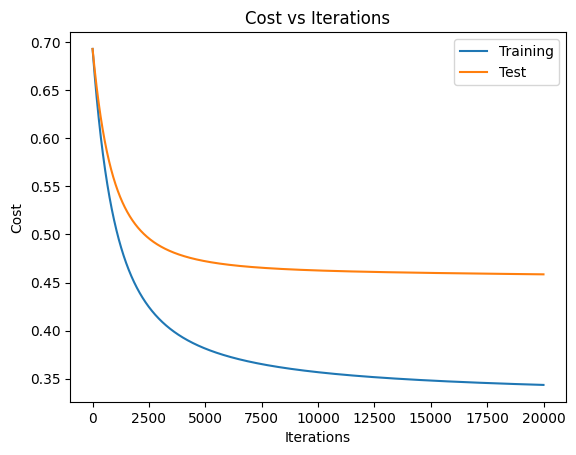

In [8]:
# plot learning curve
plt.plot(J_history, label='Training')
plt.plot(test_J_history, label='Test')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.legend()
plt.show()

## Task 3: Regularization Analysis - Finding the Optimal λ Value **(20 points)**

`lambda_reg` controls the strength of the regularization applied to the model.  
- When `lambda_reg` is set to **zero**, regularization is effectively turned off.  
- As `lambda_reg` increases, the penalty for large weights becomes more significant, helping to **reduce overfitting**.  



### 🔧 Task Instructions
- Experiment with different values of `lambda_reg` in the set **[0.0, 0.01, 0.03, 0.1, 0.3]**.  
- Plot the **learning curves** for both the training and test sets on the same figure to visualize the impact of each value.  
- Determine which value of `lambda_reg` yields the **best performance** on this dataset.  
- Report the performance (accuracy, precision, recall) using the best value of:  
  - **Accuracy**  
  - **Precision**  
  - **Recall**  



**Hyperparameters for this task**:  
- `learning_rate = 0.005`  
- `num_iterations = 1200`  


Training with lambda_reg = 0.0
Iteration    0: Train Cost   0.6931   Test Cost   0.6931
Iteration  300: Train Cost   0.4686   Test Cost   0.5244
Iteration  600: Train Cost   0.4092   Test Cost   0.4868
Iteration  900: Train Cost   0.3843   Test Cost   0.4736
Accuracy: 0.8032786885245902
Precision: 0.7948717948717948
Recall: 0.8857142857142857


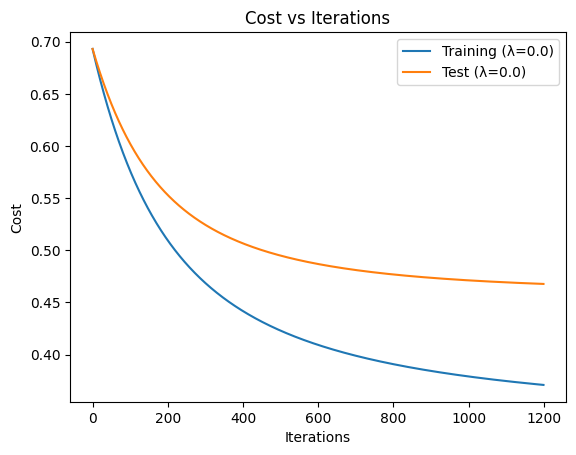

Training with lambda_reg = 0.01
Iteration    0: Train Cost   0.6931   Test Cost   0.6931
Iteration  300: Train Cost   0.4686   Test Cost   0.5244
Iteration  600: Train Cost   0.4093   Test Cost   0.4869
Iteration  900: Train Cost   0.3843   Test Cost   0.4737
Accuracy: 0.8032786885245902
Precision: 0.7948717948717948
Recall: 0.8857142857142857


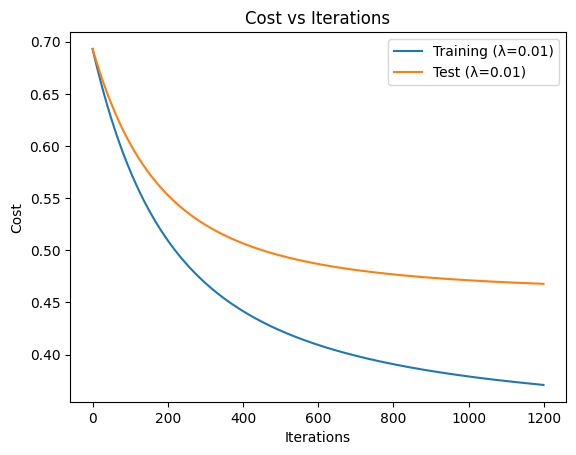

Training with lambda_reg = 0.03
Iteration    0: Train Cost   0.6931   Test Cost   0.6931
Iteration  300: Train Cost   0.4686   Test Cost   0.5245
Iteration  600: Train Cost   0.4093   Test Cost   0.4870
Iteration  900: Train Cost   0.3844   Test Cost   0.4739
Accuracy: 0.8032786885245902
Precision: 0.7948717948717948
Recall: 0.8857142857142857


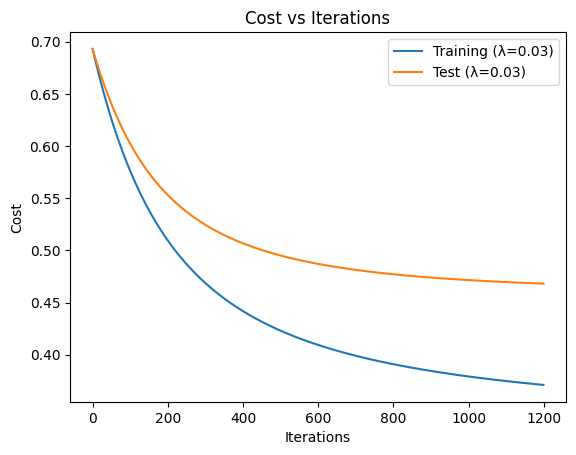

Training with lambda_reg = 0.1
Iteration    0: Train Cost   0.6931   Test Cost   0.6931
Iteration  300: Train Cost   0.4687   Test Cost   0.5247
Iteration  600: Train Cost   0.4095   Test Cost   0.4875
Iteration  900: Train Cost   0.3846   Test Cost   0.4746
Accuracy: 0.8032786885245902
Precision: 0.7948717948717948
Recall: 0.8857142857142857


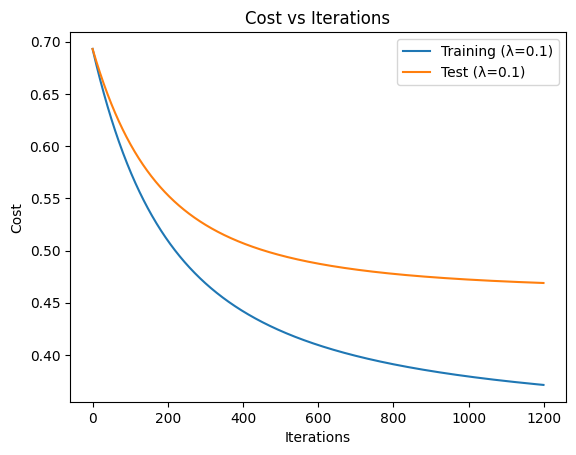

Training with lambda_reg = 0.3
Iteration    0: Train Cost   0.6931   Test Cost   0.6931
Iteration  300: Train Cost   0.4689   Test Cost   0.5253
Iteration  600: Train Cost   0.4099   Test Cost   0.4888
Iteration  900: Train Cost   0.3852   Test Cost   0.4764
Accuracy: 0.8032786885245902
Precision: 0.7948717948717948
Recall: 0.8857142857142857


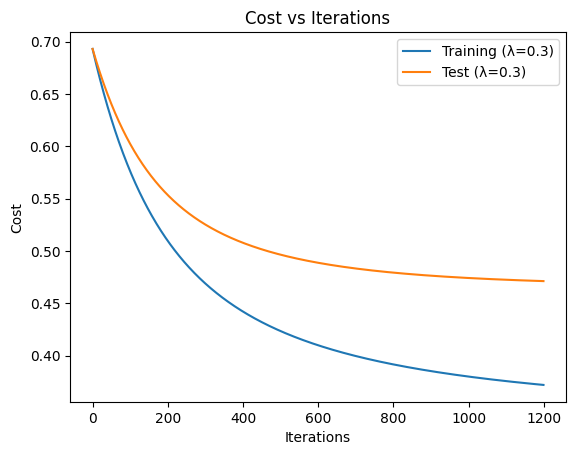

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

learning_rate = 0.005
num_iterations = 1200
lambda_reg_values = [0.0, 0.01, 0.03, 0.1, 0.3]

for lambda_reg in lambda_reg_values:
    print(f"Training with lambda_reg = {lambda_reg}")
    w_in = np.zeros(X_train_array.shape[1] + 1, dtype=float)
    w, J_history, test_J_history = gradient_descent_logistic_ridge(X_train_array, y_train_array, X_test_array, y_test_array, w_in, learning_rate, num_iterations, lambda_reg)
    X_test_bias = np.column_stack([np.ones(X_test_array.shape[0]), X_test_array])
    y_pred_prob = sigmoid(X_test_bias @ w)
    y_pred = (y_pred_prob > 0.5).astype(int)

    # evaluate performance
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))


    plt.plot(J_history, label=f'Training (λ={lambda_reg})')
    plt.plot(test_J_history, label=f'Test (λ={lambda_reg})')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost vs Iterations')
    plt.legend()
    plt.show()

## Task 4: Custom vs. scikit-learn — Comprehensive Benchmark Analysis **(20 points)**

- Use the **`LogisticRegression`** model from **scikit-learn** to re-evaluate the dataset while keeping the same (or as similar as possible) hyperparameter settings for a **fair comparison**.  
- Report the performance using the **same evaluation metrics** as previously used.  
- Compare the results to your **custom implementation**. Analyze whether scikit-learn’s built-in logistic regression achieves similar, better, or worse performance.  
- Explain the potential reasons for any differences you observe. 



In [30]:
from sklearn.linear_model import LogisticRegression

# initialize and train model
model = LogisticRegression(penalty='l2', C=1/0.01)
model.fit(X_train_array, y_train)
preds = model.predict(X_test_array)

# evaluate performance
print("Accuracy:", accuracy_score(y_test, preds))
print("Precision:", precision_score(y_test, preds))
print("Recall:", recall_score(y_test, preds))

Accuracy: 0.7868852459016393
Precision: 0.775
Recall: 0.8857142857142857


When comparing my custom logistic ridge regression to scikit-learn’s implementation (λ = 0.01), both achieved nearly identical recall, with my implementation showing slightly higher accuracy and precision. These minor differences may arise from variations in optimization routines (gradient descent vs. sklearn's solvers) and convergence criteria.

## Task 5: Understanding Convergence - The `tol` Parameter Deep Dive **(15 points)**

In many models that use gradient descent–based optimization, `tol` is a key hyperparameter.  
In this task, you will explore its role using **logistic regression**.

### **Understanding the Tolerance Parameter**
The `tol` parameter in sklearn's LogisticRegression controls **when to stop the optimization process**:

- **What it measures**: Maximum change in the optimization objective between iterations
- **Stopping criterion**: Training stops when improvement falls below this threshold
- **Trade-off**: Tighter tolerance (smaller values) → more iterations → potentially better convergence
- **Efficiency**: Looser tolerance (larger values) → fewer iterations → faster training but potentially suboptimal results

### **Mathematical Context**
For solver convergence, sklearn typically uses:
$$|\nabla J(\mathbf{w}^{(t)}) - \nabla J(\mathbf{w}^{(t-1)})| < \text{tol}$$
Or for objective function change:
$$|J(\mathbf{w}^{(t)}) - J(\mathbf{w}^{(t-1)})| < \text{tol}$$


### **Expected Insights**

Experiment with the following `tol` values to explore their impact on model convergence, training speed, and performance:

**Typical Patterns You Should Observe:**
- **Tighter tolerance (`1e-6`, `1e-7`)** → Training is slower but may yield slightly better performance.  
- **Moderate tolerance (`1e-4`, `1e-5`)** → A good balance between speed and accuracy (close to scikit-learn’s default).  
- **Loose tolerance (`1e-1`, `1e-2`)** → Faster training but may stop too early, leading to suboptimal results.  
- **Performance plateau** → Beyond a certain level of tightness, further decreasing tolerance does not yield meaningful gains.  
- **Convergence issues** → Extremely tight tolerance may require more iterations than allowed, preventing proper convergence.  


### ✅ **Success Criteria**
- [ ] Systematic testing across tolerance range (8+ values)
- [ ] Comprehensive performance and efficiency metrics
- [ ] Professional visualization with multiple perspectives
- [ ] Clear identification of trade-offs and recommendations
- [ ] Evidence-based analysis of sklearn's default choice

In [32]:
import time
tol_values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8]

results = []

for tol in tol_values:
    start_time = time.time()
    model = LogisticRegression(
        penalty='l2',
        C=1/0.01,
        tol=tol,
        max_iter=1200
    )
    model.fit(X_train_array, y_train)
    train_time = time.time() - start_time
    preds = model.predict(X_test_array)
    
    results.append({
        'tol': tol,
        'accuracy': accuracy_score(y_test, preds),
        'precision': precision_score(y_test, preds),
        'recall': recall_score(y_test, preds),
        'train_time_sec': train_time,
    })

df_results = pd.DataFrame(results)
df_results


,tol,accuracy,precision,recall,train_time_sec
0,1.000000e-01,0.786885,0.789474,0.857143,0.010938
1,1.000000e-02,0.786885,0.775000,0.885714,0.020375
2,1.000000e-03,0.770492,0.769231,0.857143,0.018842
3,1.000000e-04,0.786885,0.775000,0.885714,0.003868
4,1.000000e-05,0.786885,0.775000,0.885714,0.009192
5,1.000000e-06,0.786885,0.775000,0.885714,0.004161
6,1.000000e-07,0.786885,0.775000,0.885714,0.007288
7,1.000000e-08,0.786885,0.775000,0.885714,0.003799


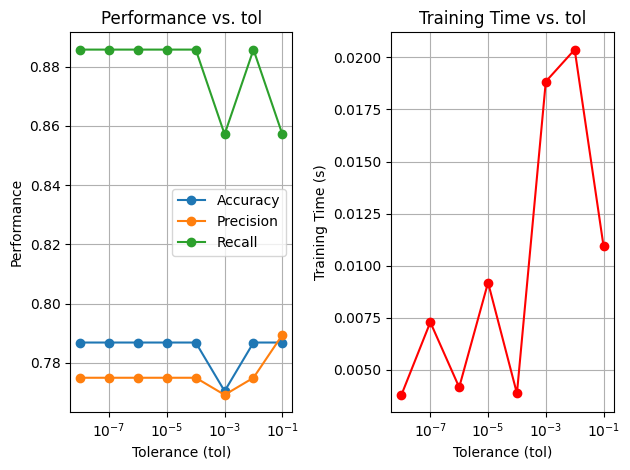

In [34]:
# accuracy, precision, recall vs tol
plt.subplot(1,2,1)
plt.plot(df_results['tol'], df_results['accuracy'], marker='o', label='Accuracy')
plt.plot(df_results['tol'], df_results['precision'], marker='o', label='Precision')
plt.plot(df_results['tol'], df_results['recall'], marker='o', label='Recall')
plt.xscale('log')
plt.xlabel('Tolerance (tol)')
plt.ylabel('Performance')
plt.title('Performance vs. tol')
plt.legend()
plt.grid(True)

# training time vs tol
plt.subplot(1,2,2)
plt.plot(df_results['tol'], df_results['train_time_sec'], marker='o', color='red')
plt.xscale('log')
plt.xlabel('Tolerance (tol)')
plt.ylabel('Training Time (s)')
plt.title('Training Time vs. tol')
plt.grid(True)

plt.tight_layout()
plt.show()


**Observations:**
1. Performance plateau

- Accuracy, precision, and recall remain largely constant across tol values ≤ 0.01.

2. Training time

- Looser tolerances (tol=0.1 → 0.01 s) → extremely fast convergence.
- Training time does not increase dramatically here, likely because this is a small dataset.

3. Solver behavior

- Very loose tolerances (0.1) may stop early, so performance is slightly lower than moderate values.
- Very tight tolerances (1e-8) do not improve performance on this dataset, but ensure convergence if needed


**Recommendation:**
- sklearn’s default tol ~1e-4 strikes a good balance between convergence and efficiency
- Trade-off: tighter tolerances lead to negligible performance gain but slightly longer training, whereas looser tolerances lead to faster but potentially worse convergence

## Bonus Task: Implementing `tol` in Your L2 Gradient Descent (15 points)

*This is a bonus task, feel free to skip this task*

To make your **custom L2-regularized gradient descent** implementation comparable with scikit-learn’s `LogisticRegression`, you should add the `tol` parameter as a **stopping criterion**.  

### ✅ Instructions:
1. During each iteration of gradient descent, compute the **change in cost (loss)** between the current and previous step.  
2. If the change is **smaller than `tol`**, stop the training loop early.  
3. Use the same tolerance values (`tol`) as in scikit-learn for a fair comparison.  
4. Report:  
   - The number of iterations completed before convergence.  
   - Final training and test performance metrics.  

In [37]:
def gradient_descent_logistic_ridge_tol(X_train, y_train, X_test, y_test, w_in, alpha, num_iters, lambda_reg, tol=1e-4):
    """
    L2-regularized logistic regression with early stopping based on tolerance.

    Returns:
        w          : final weights
        J_history  : training cost history
        test_J_history : test cost history
        n_iter     : iterations actually performed
    """
    m_train = X_train.shape[0]
    m_test = X_test.shape[0]

    X_train_bias = np.column_stack([np.ones(m_train), X_train])
    X_test_bias = np.column_stack([np.ones(m_test), X_test])

    w = np.copy(w_in)
    J_history = []
    test_J_history = []

    prev_cost = float('inf')

    for i in range(num_iters):
        gradient = compute_gradient_logistic_ridge(X_train_bias, y_train, w, lambda_reg)
        w = w - alpha * gradient

        train_cost = compute_cost_logistic_ridge(X_train_bias, y_train, w, lambda_reg)
        test_cost = compute_cost_logistic_ridge(X_test_bias, y_test, w, lambda_reg)

        J_history.append(train_cost)
        test_J_history.append(test_cost)

        # check tol for early stopping
        if abs(prev_cost - train_cost) < tol:
            print(f"Converged at iteration {i+1}!")
            return w, J_history, test_J_history, i+1

        prev_cost = train_cost

        if i % 300 == 0:
            print(f"Iteration {i:4}: Train Cost {train_cost:8.4f}   Test Cost {test_cost:8.4f}")

    return w, J_history, test_J_history, num_iters


In [38]:
tol = 1e-4
w_in = np.zeros(X_train_array.shape[1] + 1)

w, J_history, test_J_history, n_iter = gradient_descent_logistic_ridge_tol(
    X_train_array, y_train_array, X_test_array, y_test_array,
    w_in, alpha=0.005, num_iters=15000, lambda_reg=0.01, tol=tol
)

print(f"Number of iterations performed: {n_iter}")
preds = (X_test_array @ w[1:] + w[0]) > 0.5
print("Accuracy:", accuracy_score(y_test, preds))
print("Precision:", precision_score(y_test, preds))
print("Recall:", recall_score(y_test, preds))

Iteration    0: Train Cost   0.6916   Test Cost   0.6919
Iteration  300: Train Cost   0.4683   Test Cost   0.5242
Iteration  600: Train Cost   0.4091   Test Cost   0.4868
Converged at iteration 663!
Number of iterations performed: 663
Accuracy: 0.7868852459016393
Precision: 0.84375
Recall: 0.7714285714285715


## Task 6: Summarize your findings below **(5 points)**

1. Early convergence
- the gradient descent stopped at 663 iterations, well before the maximum (15000)
- `tol` implementation worked -- saving time and memory from unnecessary computation

2. Cost behavior
- training cost start at ~0.69 and decreased to ~0.41, closer to the final test cost which was ~0.48

3. Performance
- accuracy, precision, and recall are all very similar to the previous implementation
- precision vs. recall trade-off: precision is slightly higher, recall is slightly lower

## AI Use Disclosure **(5 pts)**

In **1–3 short paragraphs**, clearly state whether **generative AI tools** were used to complete any part of this assignment.

- If **no AI was used**, write:  
  *“I did not use generative AI tools on this assignment.”*  

- If **AI was used**, you must specify:  
  1. **Tool(s)** used (e.g., ChatGPT, GitHub Copilot, Claude, etc.)  
  2. **How** they were used (e.g., idea generation, debugging, code suggestions, writing help)  
  3. **Where** they influenced your work (which questions/sections)  
  4. **Edits & verification** you made (how you checked correctness, what you modified)  

### AI Use Template
- **Used AI?** Yes / No  
- **Tool(s):**  
- **Purpose / How used (1–3 sentences):**  
- **Scope (which questions/sections):**  
- **Edits & verification (what you changed and how you checked correctness):**  

> **Example (for illustration only):**  
> - Used AI? Yes  
> - Tools: ChatGPT (free), GitHub Copilot  
> - How used: Asked for a pandas snippet to impute missing values and for a seaborn example.  
> - Scope: Q1(b) imputation, Q2(a) first draft of bar chart code.  
> - Edits & verification: Rewrote code to use `groupby().transform('median')`; validated results by comparing summary stats; added axis labels manually.  

**Grading (5 points):**  
- **5 points** = complete, specific, and honest (tools named, usage described clearly)  
- **3–4 points** = vague or missing some details  
- **1–2 points** = minimal effort or very unclear  
- **0 points** = missing or misleading disclosure  


- Used AI? Yes
- Tools: ChatGPT
- How used: Asked for help with debugging because my GD was not returning test costs (all were `nan`), and checking that my GD implementation was correct despite nearly identical results across lambda values. 
- Scope: Step 5 of task 2, and step 3 of task 3 where we are asked to plot learning curves.
- Edits & verification: 1) `nan` values are converted to 0 for `X_train_array` and `X_test_array`, 2) no code changes made, just checking that the results made sense.